El objetivo de este informe es entregar información que ayude a optimizar los gastos de marketing en el departamento analítico de Y.Afisha. Para su realización se trabajará con tres dataframes, visits, orders y costs que se describen a continuación.

* *Visits* :registros del servidor con datos sobre las visitas al sitio web:
- Uid — identificador único del usuario
- Device — dispositivo del usuario
- Start Ts — fecha y hora de inicio de la sesión
- End Ts — fecha y hora de término de la sesión
- Source Id — identificador de la fuente de anuncios de la que proviene el usuario


* *Orders* :datos sobre pedidos:
- Uid — identificador único del usuario que realiza un pedido
- Buy Ts — fecha y hora del pedido
- Revenue — Ingresos de Y.Afisha de este pedido


* *Costs* :datos sobre gastos de marketing:
- source_id — identificador de la fuente de anuncios
- dt — fecha
- costs — gastos en esta fuente de anuncios en este día

*Indice de contenidos*
1. [Inicialización: Importar librerías](#1.-Inicialización:-Importar-librerías)
2. [Cargar los datos: lectura de los archivos csv](#2.-Cargar-los-datos:-lectura-de-los-archivos-csv)
3. [Descripción de los datos](#3.-Descripción-de-los-datos)
4. [Análisis exploratorio de datos](#4.-Análisis-exploratorio-de-datos)
5. [Conclusiones](#5.-Conclusiones)

# 1. Inicialización: Importar librerías 

Antes de comenzar, se cargan las librerías pandas, seaborn y matplotlib.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# 2.Cargar los datos: lectura de los archivos csv

Los datos provienen de tres dataframes que se cargan a continuación:
* Visits: contiene los registros del servidor con datos sobre las visitas a Y.Afisha desde enero de 2017 hasta diciembre de 2018.
* Orders: es un archivo de volcado con todos los pedidos del período.
* Costs: son las estadísticas de gastos de marketing.

In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

# 3.Descripción de los datos

Se usarán los métodos info() y head(), lo que entregará un resumen de cada dataframe, y dará luz sobre qué tipo de correcciones pueden hacerse en ellos de forma inicial.

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


No hay datos nulos. Se renombrarán las columnas usando minúsculas. Para optimizar los datos, Device se convertirá de un tipo de datos object a category para reducir el tamaño del archive, y también se convertirán las columnas Start TS y End Ts de object a datetime. Finalmente, la columna Uid será renombrada como user_id.

In [4]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
visits = pd.read_csv('/datasets/visits_log_us.csv',
                    dtype={'Device': 'category'},
                    parse_dates=['Start Ts', 'End Ts']) \
        .rename(columns={
            'Device': 'device',
            'End Ts': 'end_ts',
            'Source Id': 'source_id',
            'Start Ts': 'start_ts',
            'Uid': 'user_id'
        })

Se comprueba si los cambios para la optimización de datos dieron resultados.

In [6]:
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   user_id    359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


,device,end_ts,source_id,start_ts,user_id
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Efectivamente, se ha reducido el tamaño del archivo, el tipo de datos ahora es correcto para cada columna y se ha puesto en minúscula los nombres de las columnas.

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [8]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


No hay datos nulos. Se renombrarán las columnas usando minúsculas y reemplazando los espacios por un guión bajo. Para optimizar los datos se convertirán las columnas Start TS y End Ts de object a datetime. Finalmente, se renombrará la columna Buy Ts a order_ts.

In [9]:
orders = pd.read_csv('/datasets/orders_log_us.csv',
                     parse_dates=['Buy Ts']) \
        .rename(columns={
            'Uid': 'user_id',
            'Buy Ts': 'order_ts',
            'Revenue': 'revenue'
        })

Se comprueba si los cambios para la optimización de datos dieron resultados.

In [10]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_ts  50415 non-null  datetime64[ns]
 1   revenue   50415 non-null  float64       
 2   user_id   50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


,order_ts,revenue,user_id
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Si bien no se redujó en gran cantidad el tamaño del archivo, si se ve mucho más ordenado ahora con las columnas en minúsculas  y la fecha convertida al tipo correcto de datos.

In [11]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [12]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


No hay datos nulos. Para optimizar los datos, se convertirá el tipo de datos de la columna dt de object a datetime, junto con renombrar dicha columna como date.

In [13]:
costs = pd.read_csv('/datasets/costs_us.csv',
                   parse_dates=['dt']) \
        .rename(columns={
            'dt': 'date'
        })

Se comprueba si los cambios para la optimización de datos dieron resultados.

In [14]:
costs.head()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   date       2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Si bien no se redujó en gran cantidad el tamaño del archivo, si se ve mucho más ordenado ahora con las columnas en minúsculas y la fecha convertida al tipo correcto de datos.

# 4.Análisis exploratorio de datos

Una vez cargados los datos y optimizados, se puede confirmar con el análisis basado en el objetivo de la tarea. Este proyecto divide su análisis en tres grandes secciones: análisis de producto, análisis de ventas y análisis de marketing.

## Análisis de producto

Este análisis pretende resolver las siguientes interrogantes:
* ¿Cuántas personas lo usan cada día, semana y mes?
* ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una
sesión).
* ¿Cuál es la duración de cada sesión?
* ¿Con qué frecuencia los usuarios regresan?

### Usuarios activos cada día, semana y mes

Se debe obtener las métricas principales que sirven para describir la cantidad de usuarios activos:

* DAU - usuarios activos diarios
* WAU - usuarios activos semanales
* MAU - usuarios activos mensuales

Ya se cuenta con el user_id, la fuente de cada usuario y una marca de tiempo para su inicio y cierre de sesión. Para calcular las métricas anteriores, primero se crearán columnas separadas para los valores de las fechas.

In [15]:
visits['year'] = visits['start_ts'].dt.year
visits['month'] = visits['start_ts'].dt.month
visits['week'] = visits['start_ts'].dt.isocalendar().week
visits['date'] = visits['start_ts'].dt.date

visits.head()

,device,end_ts,source_id,start_ts,user_id,year,month,week,date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


Now, let's calculate the metric. We'll group the existing data by the date/week/month of the session and look for the average values:

Para calcular la métrica, vamos a agrupar los datos por fecha, semana y mes de cada sesión, y cacular su promedio. 

In [16]:
dau = visits.groupby('date').agg({'user_id': 'nunique'}).mean()

wau = visits.groupby(['year', 'week']).agg({'user_id': 'nunique'}).mean()

mau = visits.groupby(['year', 'month']).agg({'user_id': 'nunique'}).mean()

In [17]:
print('Usuarios promedio por día:', int(dau))
print('Usuarios promedio por semana:', int(wau))
print('Usuarios promedio por mes:', int(mau))

Usuarios promedio por día: 907
Usuarios promedio por semana: 5716
Usuarios promedio por mes: 23228


Los datos muestran que hay un promedio de 907 usuarios por día, 5716 por semana y 23.228 mensuales.

### Sesiones por día

In [18]:
avg_session_per_day = (visits
    .groupby('date')
    .agg({'user_id':'count'})
    .mean()
)

print('Sesiones promedio por día:', int(avg_session_per_day))

Sesiones promedio por día: 987


La cantidad de sesiones promedio por día es de 987, es decir, no muchos usuarios abren su sesión más de una vez al día.

### Duración promedio de cada sesión

El ASL (average session length) o la duración promedio de la sesión se calcula como la media de la duración de todas las sesiones.

In [19]:
visits['duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
print('ASL:',(visits['duration'].mean()/60).round(2),'minutes')

ASL: 10.73 minutes


La duración promedio de cada sesión es de 10.73 minutos.

### Frecuencia de regreso de los usuarios

Para calcular la frecuencia de regreso de los usuarios se usará el sticky factor o factor de adhesión, ya que representa la lealtad de la audiencia hasta el producto, y se calcula como la división entre el DAU y el WAU o entre el DAU y el MAU.

In [20]:
sticky_wau = dau/wau*100
sticky_mau = dau/mau*100

print('Factor de adhesión semanal:',"%.2f" % sticky_wau, '%')
print('Factor de adhesión mensual:',"%.2f" % sticky_mau, '%')

Factor de adhesión semanal: 15.88 %
Factor de adhesión mensual: 3.91 %


Este cálculo ha revelado información importante para Y.Afisha. El factor de adhesión ni siquiera alcanza el 20%, por lo que el equipo de marketing deberá poner atención a este dato.

## Análisis de ventas

Este análisis pretende resolver las siguientes interrogantes:
    
* ¿Cuándo la gente empieza a comprar?
* ¿Cuántos pedidos hacen durante un período de tiempo dado?
* ¿Cuál es el tamaño promedio de compra?
* ¿Cuánto dinero traen? (LTV)

### Task Success

Utilizando como referencia el framework HEART de Google para evalular la experiencia de usuario, se puede reformular la primera pregunta del análisis bajo el concepto de task success, es decir, en qué medida se realiza una acción deseada para la empresa como una suscripción o una compra. Para averiguarlo, se deben crear columnas separadas para la marca de tiempo de la primera compra y la marca de tiempo para la primera sesión histórica de cada usuario.

In [21]:
first_order_ts = orders.groupby('user_id')['order_ts'].min()
first_order_ts.name = 'first_order_ts'

first_session_ts = visits.groupby('user_id')['start_ts'].min()
first_session_ts.name = 'first_session_ts'

orders = orders.join(first_order_ts, on='user_id')
orders = orders.join(first_session_ts, on='user_id')

orders['task_success'] = ((orders['first_order_ts'] - orders['first_session_ts']).dt.seconds) / 60

orders.head()

,order_ts,revenue,user_id,first_order_ts,first_session_ts,task_success
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,1.0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,11.0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2.0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,15.0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,27.0


Para interpretar los resultados, se creará un histograma y se imprimirá el tiempo mínimo, mediano, promedio y máximo que transcurre para que un usuario haga una orden.

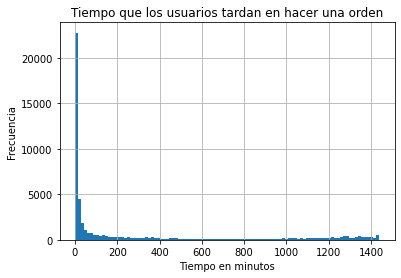

Tiempo mínimo que transcurre para que un usuario haga una orden: 0 minutes
Tiempo mediano que transcurre para que un usuario haga una orden: 20 minutes
Tiempo promedio que transcurre para que un usuario haga una orden: 4 hours
Tiempo máximo que transcurre para que un usuario haga una orden: 24 hours


In [22]:
import matplotlib.pyplot as plt

orders['task_success'].hist(bins=100)
plt.xlabel('Tiempo en minutos')
plt.ylabel('Frecuencia')
plt.title('Tiempo que los usuarios tardan en hacer una orden')
plt.show()

min_time = int(orders['task_success'].min())
median_time = int(orders['task_success'].median())
mean_time = int(orders['task_success'].mean() / 60)  
max_time_hours = int((orders['task_success'].max() / 60).round())

print('Tiempo mínimo que transcurre para que un usuario haga una orden:', min_time, 'minutes')
print('Tiempo mediano que transcurre para que un usuario haga una orden:', median_time, 'minutes')
print('Tiempo promedio que transcurre para que un usuario haga una orden:', mean_time, 'hours')  
print('Tiempo máximo que transcurre para que un usuario haga una orden:', max_time_hours, 'hours')

En promedio, los usuarios tardan cuatro horas en realizar una orden y un máximo de 24 horas.

### Cantidad de pedidos durante un periodo de tiempo

Para conocer la cantidad de pedidos durante un periodo de tiempo es necesario organizar a la población en cohortes, es decir, un grupo de usuario que comparte una característica en común y que se define por dicho evento común para ellos y el periodo de tiempo durante el cual debe ocurrir dicho evento. En este caso, la cohorte estará definida por la fecha de su primera compra.

In [23]:
orders['first_order_month'] = orders['first_order_ts'].astype('datetime64[M]')
orders['order_month'] = orders['order_ts'].astype('datetime64[M]')

orders['cohort_lifetime'] = (orders['order_month'] - orders['first_order_month']) / np.timedelta64(1, 'M')

orders['cohort_lifetime'] = orders['cohort_lifetime'].round().astype('int')

orders['first_order_month'] = orders['first_order_month'].dt.strftime('%Y-%m')

orders.head()

,order_ts,revenue,user_id,first_order_ts,first_session_ts,task_success,first_order_month,order_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,1.0,2017-06,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,11.0,2017-06,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2.0,2017-06,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,15.0,2017-06,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,27.0,2017-06,2017-06-01,0


Ahora se construirá una tabla dinámica que muestre los pedidos durante un periodo de tiempo.

In [24]:
order_pivot = orders.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='user_id',
    aggfunc='count',
)
order_pivot

order_pivot.fillna('') 

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,2354.0,177.0,174.0,226.0,292.0,218.0,276.0,174.0,212.0,153.0,96.0,86.0
2017-07,2186.0,100.0,120.0,104.0,72.0,82.0,61.0,50.0,58.0,24.0,53.0,
2017-08,1533.0,108.0,100.0,81.0,85.0,62.0,49.0,78.0,46.0,46.0,,
2017-09,2933.0,219.0,161.0,164.0,67.0,109.0,108.0,56.0,61.0,,,
2017-10,4964.0,314.0,162.0,122.0,129.0,103.0,86.0,125.0,,,,
2017-11,4813.0,397.0,182.0,211.0,136.0,59.0,102.0,,,,,
2017-12,5052.0,270.0,202.0,179.0,86.0,105.0,,,,,,
2018-01,3783.0,224.0,159.0,64.0,78.0,,,,,,,
2018-02,4095.0,222.0,83.0,70.0,,,,,,,,


Para interpretar los resultados, se creará un mapa de calor usando la librería seaborn.

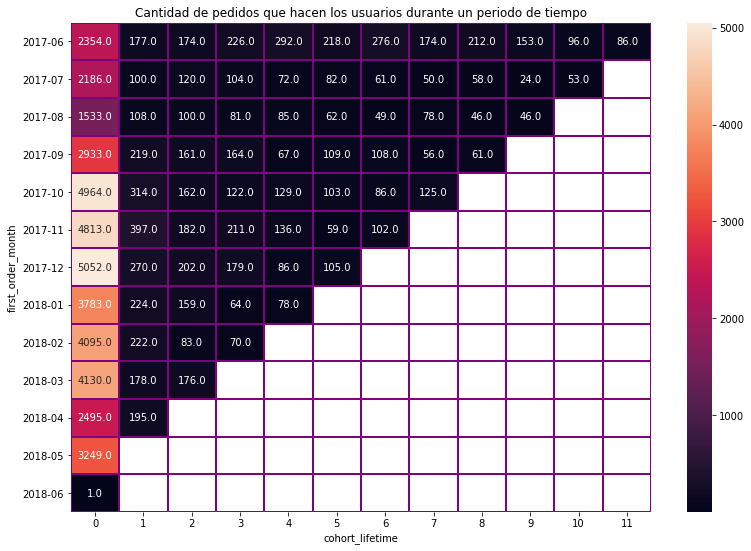

In [25]:
plt.figure(figsize=(13, 9))
plt.title('Cantidad de pedidos que hacen los usuarios durante un periodo de tiempo')
order_heatmap = sns.heatmap(
    order_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='purple',
) 


Las primeras cohortes trajeron ingresos alcanzando un peak en Diciembre del año 2017, sin embargo, el número de ordenes empieza a decaer continuamente desde ese momento.

### Tamaño promedio de compra

Para determinar el tamaño promedio de las compras también se utilizará el análisis de cohortes, calculando primero el total  el de dólares gastados para cada cohorte y luego el promedio según la cantidad de usuarios de cada cohorte.

In [26]:
orders_grouped_by_cohorts = orders.groupby(
    ['first_order_month', 'cohort_lifetime']
).agg({'revenue': 'sum', 'user_id': 'nunique'})

orders_grouped_by_cohorts['revenue_per_user'] = (
    orders_grouped_by_cohorts['revenue']
    / orders_grouped_by_cohorts['user_id']
) 

orders_grouped_by_cohorts.columns = ['total_revenue', 'users_amount', 'revenue_per_user']

orders_grouped_by_cohorts

total_revenue  users_amount  \
first_order_month cohort_lifetime                                
2017-06           0                      9557.49          2023   
                  1                       981.82            61   
                  2                       885.34            50   
                  3                      1931.30            54   
                  4                      2068.58            88   
...                                          ...           ...   
2018-03           2                      1114.87            58   
2018-04           0                     10600.69          2276   
                  1                      1209.92            69   
2018-05           0                     13925.76          2988   
2018-06           0                         3.42             1   

                                   revenue_per_user  
first_order_month cohort_lifetime                    
2017-06           0                        4.724414  
                  1                       16.095410  
                  2                       17.706800  
                  3                       35.764815  
                  4                       23.506591  
...                                             ...  
2018-03           2                       19.221897  
2018-04           0                        4.657597  
                  1                       17.535072  
2018-05           0                        4.660562  
2018-06           0                        3.420000  

[79 rows x 3 columns]

Ahora se construirá una tabla dinámica con la función agregada de la media. 

In [27]:
revenue_pivot = orders_grouped_by_cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='revenue_per_user',
    aggfunc='mean',
) 

revenue_pivot.fillna('') 

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.724414,16.09541,17.7068,35.764815,23.506591,22.207761,31.011935,25.033191,19.29569,27.233556,25.681333,9.804151
2017-07,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,
2017-08,5.276518,11.148793,11.851321,12.182955,16.92125,12.139063,9.620333,12.610455,21.07,8.307419,,
2017-09,5.644529,22.188385,13.4452,138.669189,19.881538,26.095,27.437121,16.961351,11.044651,,,
2017-10,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,,,,
2017-11,5.154683,7.339054,6.786583,12.51066,7.457284,4.580833,7.564839,,,,,
2017-12,4.738191,7.816575,39.366019,48.135052,27.4314,23.518413,,,,,,
2018-01,4.135636,8.721228,12.365542,11.199767,4.699556,,,,,,,
2018-02,4.156987,8.61,4.942414,6.941026,,,,,,,,


Nuevamente, para visualizar los resultados de dicha tabla se creará un mapa de calor que ilustre como el tamaño promedio de compra varía en el tiempo.

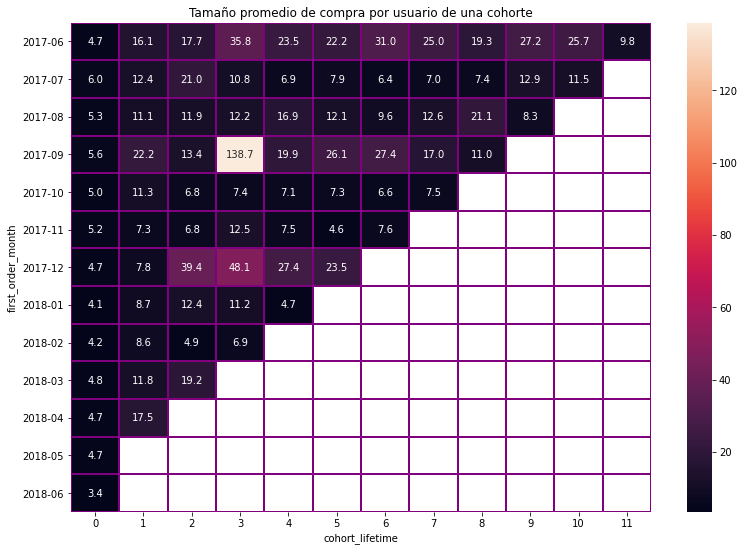

In [28]:
plt.figure(figsize=(13, 9))
plt.title('Tamaño promedio de compra por usuario de una cohorte')
revenue_heatmap = sns.heatmap(
    revenue_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='purple',
) 

Se observa que el máximo de compra alcanzado fue en septiembre del 2017.

### Lifetime Value (LVT)

El LVT indica la cantidad todal de dinero que un cliente aporta a una empresa.

Para calcular el LTV primero se calculará el tamaño de cada cohorte, es decir, la cantidad de compradores que cada cohorte contiene. Luego, se agruparán las cohortes en base al ingreso que traen a la empresa. Con esta infrormación, se usará el método merge() para unir la infromación sobre el tamaño de las cohortes y los ingresos que traen. A partir de estos datos, se puede calcular el LTV dividiendo los ingresos por la cantidad de usuarios, lo que nos mostrará el LTV para cada cohorte.

In [29]:
cohort_size = (
    orders.groupby('first_order_month')
    .agg({'user_id': 'nunique'})
    .reset_index()
)
cohort_size.columns = ['first_order_month', 'buyers_amount']

margin_rate = 0.4

cohorts = (
    orders.groupby(['first_order_month', 'cohort_lifetime', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)

report = pd.merge(cohort_size, cohorts, on='first_order_month')

report['ltv'] = report['revenue'] * margin_rate / report['buyers_amount']

report.head()

,first_order_month,buyers_amount,cohort_lifetime,order_month,revenue,ltv
0,2017-06,2023,0,2017-06-01,9557.49,1.889766
1,2017-06,2023,1,2017-07-01,981.82,0.194131
2,2017-06,2023,2,2017-08-01,885.34,0.175055
3,2017-06,2023,3,2017-09-01,1931.30,0.381869
4,2017-06,2023,4,2017-10-01,2068.58,0.409012


Se resumirá la información sobre el LTV para cada cohorte en una tabla dinámica, y se visualizará con un mapa de calor.

In [30]:
ltv_pivot = report.pivot_table(
    index='first_order_month', columns='cohort_lifetime', values='ltv', aggfunc='mean'
).round(2)

ltv_pivot.fillna('') 

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,1.89,0.19,0.18,0.38,0.41,0.29,0.38,0.23,0.22,0.24,0.23,0.1
2017-07,2.40,0.13,0.25,0.14,0.07,0.06,0.05,0.06,0.06,0.06,0.06,
2017-08,2.11,0.19,0.18,0.16,0.2,0.11,0.08,0.16,0.12,0.08,,
2017-09,2.26,0.45,0.21,1.59,0.16,0.26,0.28,0.1,0.07,,,
2017-10,2.00,0.21,0.08,0.06,0.06,0.05,0.03,0.05,,,,
2017-11,2.06,0.16,0.08,0.13,0.06,0.02,0.05,,,,,
2017-12,1.90,0.1,0.37,0.43,0.13,0.14,,,,,,
2018-01,1.65,0.12,0.12,0.06,0.03,,,,,,,
2018-02,1.66,0.11,0.03,0.03,,,,,,,,


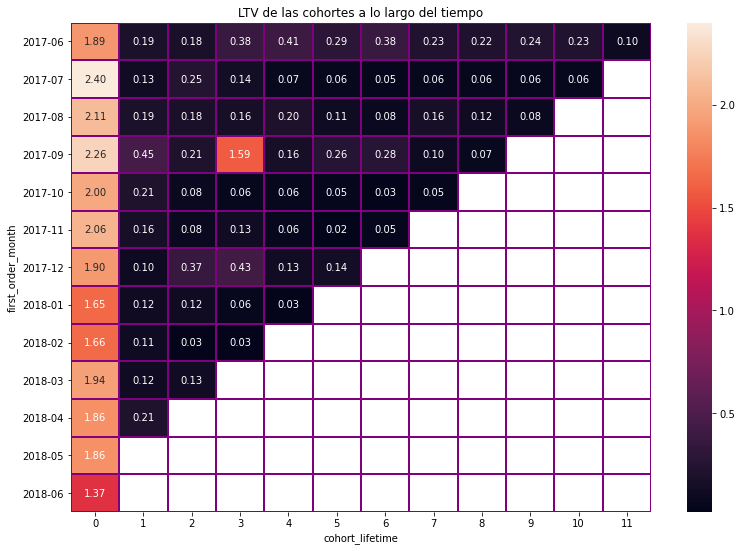

In [31]:
plt.figure(figsize=(13, 9))
plt.title('LTV de las cohortes a lo largo del tiempo')
order_heatmap = sns.heatmap(
    ltv_pivot,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='purple',
) 

La información de este gráfico se condice con la del gráfico anterior, ya que muestra un LTV elevado en septiembre del 2017.

## Análisis de marketing

Este análisis pretende resolver las siguientes interrogantes:

* ¿Cuánto dinero se gastó? Total por fuente a lo largo del tiempo
* ¿Cuánto costó la adquisición de clientes de cada una de las fuentes?
* ¿Cuán rentables eran las inversiones? (ROI)

### Gastos totales y gastos por fuentes

In [32]:
costs['costs'].sum()

329131.62

En total, el equipo de marketing ha gastado 329.131,62 dólares. Sin embargo, es necesario desagregar esta información para cada fuente de anuncios.

In [33]:
total_costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()
total_costs_by_source['percentage'] = total_costs_by_source['costs'] / (costs['costs'].sum()) *100

total_costs_by_source

,source_id,costs,percentage
0,1,20833.27,6.329769
1,2,42806.04,13.005751
2,3,141321.63,42.937725
3,4,61073.60,18.555981
4,5,51757.10,15.725350
5,9,5517.49,1.676378
6,10,5822.49,1.769046


Para visualizar de manera clara la información de la tabla anterior, se creará un gráfico de torta.

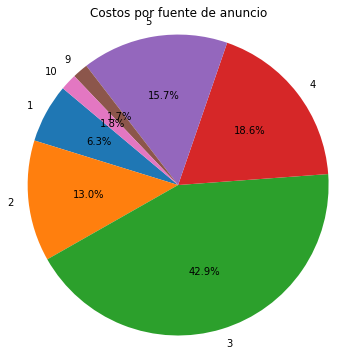

In [34]:
data = total_costs_by_source['percentage']
labels = total_costs_by_source['source_id']

plt.figure(figsize=(6, 6))
plt.title('Costos por fuente de anuncio')
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 

plt.show()

Del gráfico, se observa con claridad que más de un 40% se ha gastado en la fuente de anuncios número 3. Ahora descubriremos cómo se gasta en marketing a lo largo del tiempo.

In [35]:
costs['month'] = costs['date'].astype('datetime64[M]')

costs_by_month = costs.groupby('month').agg({'costs':'sum'}).reset_index()
costs_by_month['percentage'] = costs_by_month['costs'] / (costs['costs'].sum()) *100

costs_by_month['month'] =costs_by_month['month'].dt.strftime('%Y-%m') 

costs_by_month

,month,costs,percentage
0,2017-06,18015.00,5.473494
1,2017-07,18240.59,5.542035
2,2017-08,14790.54,4.493807
3,2017-09,24368.91,7.404001
4,2017-10,36322.88,11.035974
5,2017-11,37907.88,11.517544
6,2017-12,38315.35,11.641346
7,2018-01,33518.52,10.183926
8,2018-02,32723.03,9.942232
9,2018-03,30415.27,9.241066


Nuevamente, para visualizar de manera clara la información de la tabla anterior, se creará un gráfico de barras.

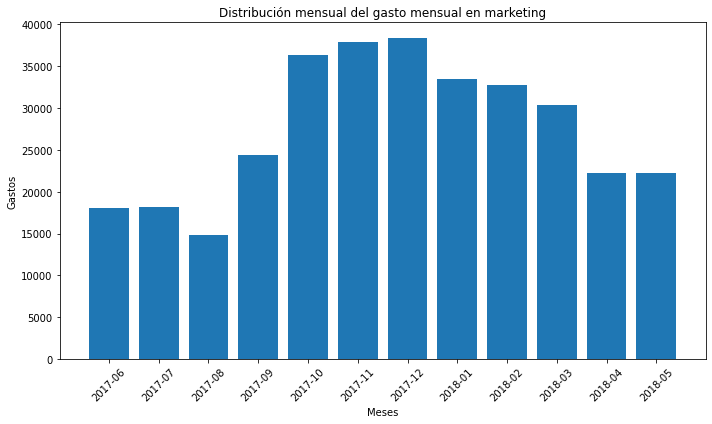

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(costs_by_month['month'], costs_by_month['costs'])

plt.xlabel('Meses')
plt.ylabel('Gastos')
plt.title('Distribución mensual del gasto mensual en marketing')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Del gráfico, se observa que el momento de mayor gastos en marketing se encuentra en el último trimeste de año.

### Costo de adquisición de clientes (CAC)

El CAC (customer acquisition cost) es el costo para la empresa de adquirir cada cliente. En este caso, nos interesa obtener esta información desgregada para cada una de las fuentes, por lo que primero se calculará la cantidad de usuarios por cada fuente.

In [37]:
source_sizes = visits.groupby('source_id').agg({'user_id': 'nunique'}).reset_index()
source_sizes.columns = ['source_id', 'visitors']

source_sizes

,source_id,visitors
0,1,18999
1,2,26245
2,3,74756
3,4,83525
4,5,56974
5,6,6
6,7,34
7,9,9264
8,10,8067


Para calcular el CAC, se dividen los costos de cada fuente de anuncio por su cantidad de visitantes.

In [38]:
cac = source_sizes.join(total_costs_by_source['costs'], how='left', on = 'source_id')
cac['cac'] = cac['costs'] / cac['visitors']

cac

,source_id,visitors,costs,cac
0,1,18999,42806.04,2.253068
1,2,26245,141321.63,5.384707
2,3,74756,61073.60,0.816973
3,4,83525,51757.10,0.619660
4,5,56974,5517.49,0.096842
5,6,6,5822.49,970.415000
6,7,34,NaN,NaN
7,9,9264,NaN,NaN
8,10,8067,NaN,NaN


LLama la atención el alto CAC para la fuente número 6. Fuentes que a simple vista no parecen costarle mucho a la empresa son la 3, 4 y 5. Ademas, hay fuentes en las que no se ha incurrido en costos, pero que tienen una flujo medio de visitantes como la fuentes 9 y 10.

### Rentabilidad de la inversión (ROI)

Para conocer cuán rentables han sido las inversiones se calculará el ROI (return on marketing investment). Para llevar a cabo dicha información se restan las inversiones del beneficio neto, para luego dividir dicha cifra por las inversiones.

In [39]:
cohort_sizes = (
    orders.groupby('first_order_month')
    .agg({'user_id': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'buyers_amount']

margin_rate = 0.4

cohorts = (
    orders.groupby(['first_order_month', 'cohort_lifetime', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)

report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

report['roi'] = ((report['revenue'] - cac['costs']) / cac['costs']) * 100

report.head()

,first_order_month,buyers_amount,cohort_lifetime,order_month,revenue,roi
0,2017-06,2023,0,2017-06-01,9557.49,-77.672567
1,2017-06,2023,1,2017-07-01,981.82,-99.305259
2,2017-06,2023,2,2017-08-01,885.34,-98.550372
3,2017-06,2023,3,2017-09-01,1931.30,-96.268531
4,2017-06,2023,4,2017-10-01,2068.58,-62.508677


El ROI tiene cifras negativas, lo que indica que los gastos exceden los ingresos generados, por lo que las inversiones no están siendo rentables.

# 5.Conclusiones

Para comenzar el trabajo se importaron las librerías pandas, seaborn y matplotlib. Luego, se cargaron tres dataframes: visits, orders y costs, los cuales fueron optimizados, cambiando tanto los nombres de las columnas como los tipos de datos. El análisis de datos fue divido en tres grandes secciones: análisis de producto, análisis de ventas y análisis de marketing.

El análisis de producto dio como resultado las siguientes métricas:
* *Usuarios activos*
- Diaros: 907 
- Semanales: 5,825 
- Mensuales: 23.228 
- *Sesiones por día*: 987
- *Duración promedio de cada sesión*: 10.73 minutos
- *Factor de adhesión*
- Semanal: 15.88%
- Mensual: 3.91%

El análisis de ventas arrojó que el tiempo promedio en que los usuarios comienzan a comprar es de 4 horas. Además, se realizó un análisis de cohortes que mostró que el máximo de compras fue alcanzado en septiembre del 2017.


El análisis de marketing mostró un gasto total de 329.131 dólares, dicho gastó tuvo su mayor alza en el último trimestre del año 2017. Además, se calculó el CAC y el ROI en base a los cuales se han formulado recomendaciones para el equipo de marketing:


- a) Invertir más en aquellas fuentes de anuncios que tienen un menor CAC, tales como las fuentes 3, 4 y 5.
- b) Invertir menos en aquellas fuentes de anuncios que tienen un alto CAC, como la fuente número 6.
- c) Intentar invertir en algunas fuentes en las que aún no se ha invertido pero que tienen algunos visitantes como la 9 y la 10. 
- d) Diseñar un plan para que el ROI no sea negativo. Una forma de verificar esto es que que el LTV sea mayor al CAC.